In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de datos

In [28]:
df=pd.read_csv("arabica_data_cleaned.csv" ,index_col=False)
df=df.drop("Unnamed: 0",axis=1)
df

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,juchique de ferrer,...,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,"department d'artibonite , haiti",...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1308,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,jalapa,...,Green,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1309,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,nuevo oriente,...,Green,4,"May 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


Mezclar los datos para hacer un set de training y uno de test

In [34]:
df=df.sample(frac=1)
df

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
487,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,alishan zou zhu yuan 阿里山鄒築園,NaN,alishan zou zhu yuan 阿里山鄒築園,NaN,blossom valley宸嶧國際,1300 m,chiayi alishan 嘉義縣阿里山鄉,...,NaN,0,"December 26th, 2014",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1300.0,1300.0,1300.0
1170,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,su-zhen huang 黃素真,NaN,黑咖啡道咖啡,none,blossom valley宸嶧國際,700m公尺,nantou,...,NaN,1,"May 22nd, 2016",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,700.0,700.0,700.0
845,Arabica,essencecoffee,Indonesia,dozen small farmer,NaN,NaN,15041753,essence coffee,1300m,lington nihuta,...,None,6,"March 20th, 2016",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1300.0,1300.0,1300.0
772,Arabica,saul m. hernandez ramirez,Mexico,el nanchi,NaN,"buenas vista, municipio de san bartolo tutotepec",1702764973,NaN,1144,san bartolo tutotepec,...,None,9,"September 27th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1144.0,1144.0,1144.0
270,Arabica,compañia colombiana agroindustrial s.a,Colombia,NaN,NaN,trilladora boananza,3-79-0635,ecom cca sa,1550,santander,...,Green,3,"January 17th, 2015",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1550.0,1550.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Arabica,carcafe ltda ci,Colombia,NaN,3-59-2318,cartago,3-59-2318,carcafe ltda,442,huila,...,Green,2,"May 10th, 2018",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,442.0,442.0,442.0
875,Arabica,"comercial internacional exportadora, s.a.",Nicaragua,santa matilde,345725 / K1620088,dry mill,017/001/534,"comercial internacional exportadora, s.a.",NaN,jinotega,...,Green,1,"March 11th, 2017",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,NaN,NaN,NaN
1222,Arabica,rosario miguel hernandez,Mexico,finca sego,NaN,"villa talea de castro, oaxaca",0,villa talea café,1400,villa talea de castro,...,None,14,"September 14th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1400.0,1400.0,1400.0
300,Arabica,yunnan coffee exchange,China,pu’er specialty coffee cupping center,YNC-16063,pu’er specialty coffee cupping center,NaN,yunnan coffee exchange,1650,yunnan,...,Green,2,"April 6th, 2017",Yunnan Coffee Exchange,683fa6014608fc10ff681b0435b0b2dbe6df988f,f6d87a6c04653c569d4911a66f89d5e30ce83b93,m,1650.0,1650.0,1650.0


Eliminamos las columnas que no son de nuestro interes

In [74]:
div=len(df)//4
df2=df.copy()
names=df2.columns.values
a=[0,1,3,4,5,6,7,8,10,11,12,13,15,16,35,36,37,38,39]
names=names[a]
df2=df2.drop(names,axis=1)
df2

,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
487,Taiwan,chiayi alishan 嘉義縣阿里山鄉,2013/2014,Typica,Other,7.75,7.75,7.50,7.50,7.50,...,7.58,83.08,0.11,0,0.0,NaN,0,1300.0,1300.0,1300.0
1170,Taiwan,nantou,2014,Typica,Natural / Dry,6.92,7.00,7.17,7.00,7.42,...,7.00,79.50,0.00,0,0.0,NaN,1,700.0,700.0,700.0
845,Indonesia,lington nihuta,2014,Typica,Other,7.42,7.42,7.42,7.33,7.42,...,7.42,81.83,0.11,2,0.0,None,6,1300.0,1300.0,1300.0
772,Mexico,san bartolo tutotepec,2012,Typica,Washed / Wet,7.50,7.67,7.00,7.50,7.33,...,7.67,82.17,0.15,1,0.0,None,9,1144.0,1144.0,1144.0
270,Colombia,santander,2014,Caturra,Natural / Dry,7.67,7.83,7.67,7.75,7.67,...,7.50,83.92,0.12,0,0.0,Green,3,1550.0,1550.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Colombia,huila,2016,Caturra,Washed / Wet,7.67,7.67,7.50,7.67,7.67,...,7.67,83.42,0.11,0,0.0,Green,2,442.0,442.0,442.0
875,Nicaragua,jinotega,NaN,NaN,NaN,7.58,7.50,7.25,7.25,7.50,...,7.33,81.67,0.10,0,0.0,Green,1,NaN,NaN,NaN
1222,Mexico,villa talea de castro,2012,Typica,Washed / Wet,7.08,6.83,6.83,7.00,7.00,...,6.83,78.50,0.12,0,0.0,None,14,1400.0,1400.0,1400.0
300,China,yunnan,2015,Catimor,Washed / Wet,7.83,7.75,7.67,7.50,7.58,...,7.75,83.75,0.10,0,1.0,Green,2,1650.0,1650.0,1650.0


# Análisis de la variable

En este caso nos centramos en Total.Cup.Points

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          5.,   6.,  20.,  56., 311., 752., 142.,  16.]),
 array([ 0.        ,  3.01933333,  6.03866667,  9.058     , 12.07733333,
        15.09666667, 18.116     , 21.13533333, 24.15466667, 27.174     ,
        30.19333333, 33.21266667, 36.232     , 39.25133333, 42.27066667,
        45.29      , 48.30933333, 51.32866667, 54.348     , 57.36733333,
        60.38666667, 63.406     , 66.42533333, 69.44466667, 72.464     ,
        75.48333333, 78.50266667, 81.522     , 84.54133333, 87.56066667,
        90.58      ]),
 <BarContainer object of 30 artists>)

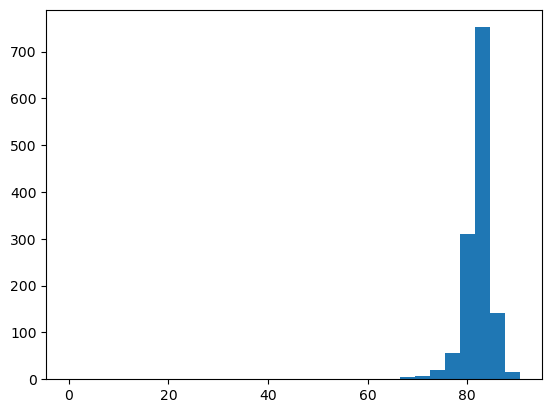

In [90]:
plt.hist(df2["Total.Cup.Points"],bins=30)

In [121]:
print('Skewness de la variable ', df2["Total.Cup.Points"].skew())

Skewness de la variable  -1.8392833814623037


Se nota la curva hacia la derecha así que se procede a realizar una transformación para normalizarla

Se elimina un valor con 0 para continuar con el análisis

In [109]:
i=df2[df2["Total.Cup.Points"]==0].index

In [111]:
df2=df2.drop(i)

,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Taiwan,chiayi alishan 嘉義縣阿里山鄉,2013/2014,Typica,Other,7.75,7.75,7.50,7.50,7.50,...,7.58,83.08,0.11,0,0.0,NaN,0,1300.0,1300.0,1300.0
1,Taiwan,nantou,2014,Typica,Natural / Dry,6.92,7.00,7.17,7.00,7.42,...,7.00,79.50,0.00,0,0.0,NaN,1,700.0,700.0,700.0
2,Indonesia,lington nihuta,2014,Typica,Other,7.42,7.42,7.42,7.33,7.42,...,7.42,81.83,0.11,2,0.0,None,6,1300.0,1300.0,1300.0
3,Mexico,san bartolo tutotepec,2012,Typica,Washed / Wet,7.50,7.67,7.00,7.50,7.33,...,7.67,82.17,0.15,1,0.0,None,9,1144.0,1144.0,1144.0
4,Colombia,santander,2014,Caturra,Natural / Dry,7.67,7.83,7.67,7.75,7.67,...,7.50,83.92,0.12,0,0.0,Green,3,1550.0,1550.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Colombia,huila,2016,Caturra,Washed / Wet,7.67,7.67,7.50,7.67,7.67,...,7.67,83.42,0.11,0,0.0,Green,2,442.0,442.0,442.0
1307,Nicaragua,jinotega,NaN,NaN,NaN,7.58,7.50,7.25,7.25,7.50,...,7.33,81.67,0.10,0,0.0,Green,1,NaN,NaN,NaN
1308,Mexico,villa talea de castro,2012,Typica,Washed / Wet,7.08,6.83,6.83,7.00,7.00,...,6.83,78.50,0.12,0,0.0,None,14,1400.0,1400.0,1400.0
1309,China,yunnan,2015,Catimor,Washed / Wet,7.83,7.75,7.67,7.50,7.58,...,7.75,83.75,0.10,0,1.0,Green,2,1650.0,1650.0,1650.0


(array([  3.,  13.,  27.,  77., 255., 402., 253., 135.,  59.,  29.,  14.,
         13.,   9.,   5.,   4.,   1.,   4.,   1.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.01103996, 0.0112291 , 0.01141824, 0.01160737, 0.01179651,
        0.01198564, 0.01217478, 0.01236391, 0.01255305, 0.01274218,
        0.01293132, 0.01312045, 0.01330959, 0.01349872, 0.01368786,
        0.01387699, 0.01406613, 0.01425526, 0.0144444 , 0.01463353,
        0.01482267, 0.01501181, 0.01520094, 0.01539008, 0.01557921,
        0.01576835, 0.01595748, 0.01614662, 0.01633575, 0.01652489,
        0.01671402]),
 <BarContainer object of 30 artists>)

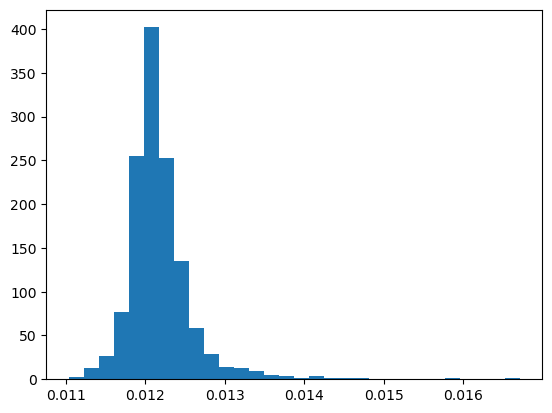

In [124]:
plt.hist((1/df2["Total.Cup.Points"]),bins=30)

In [126]:
print('Skewness de la variable transformada', 1/df2["Total.Cup.Points"].skew())

Skewness de la variable transformada -0.5436900099673385


In [127]:
df2["Total.Cup.Points"]=1/df2["Total.Cup.Points"]

# Exploración de otras variables

Países de origen

In [133]:
df2["Country.of.Origin"]

0          Taiwan
1          Taiwan
2       Indonesia
3          Mexico
4        Colombia
          ...    
1305     Colombia
1306    Nicaragua
1307       Mexico
1308        China
1309       Mexico
Name: Country.of.Origin, Length: 1310, dtype: object

Se filtra otro valor que aunque tenga datos no proporciona mucha información

In [138]:
i=df2[df2["Country.of.Origin"].isna()].index

In [140]:
df2=df2.drop(i)

Text(0, 0.5, 'Pais de origen')

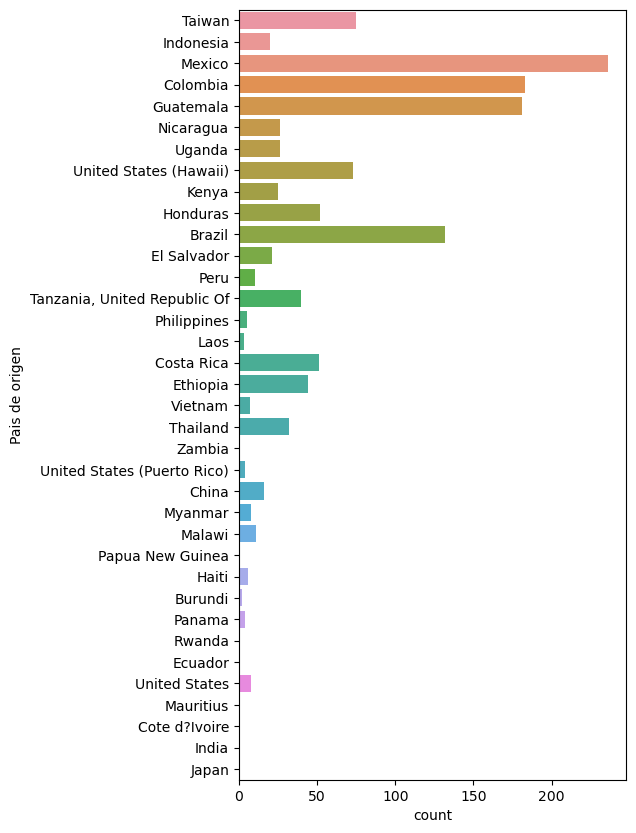

In [160]:
plt.figure(figsize=(5,10))
sns.countplot(y="Country.of.Origin",data=df2)
plt.ylabel("Pais de origen")


En el data set se encuentran principalmente datos de países latinoamericanos 

# Datos faltanes

Aunque se hizo un pequeño filtrado gracias a la exploración siguen existiendo datos faltantes 

In [161]:
total           = df2.isnull().sum().sort_values(ascending=False)
percent         = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train

,Total,Percent
altitude_mean_meters,226,17.265088
altitude_high_meters,226,17.265088
altitude_low_meters,226,17.265088
Color,215,16.424752
Variety,200,15.278839
Processing.Method,150,11.459129
Region,56,4.278075
Harvest.Year,46,3.514133
Quakers,1,0.076394
Cupper.Points,0,0.000000


In [172]:
missing_train['altitude_mean_meters':'Quakers'].Percent

altitude_mean_meters    17.265088
altitude_high_meters    17.265088
altitude_low_meters     17.265088
Color                   16.424752
Variety                 15.278839
Processing.Method       11.459129
Region                   4.278075
Harvest.Year             3.514133
Quakers                  0.076394
Name: Percent, dtype: float64

In [173]:
missing_train.index[0:8]

Index(['altitude_mean_meters', 'altitude_high_meters', 'altitude_low_meters',
       'Color', 'Variety', 'Processing.Method', 'Region', 'Harvest.Year'],
      dtype='object')

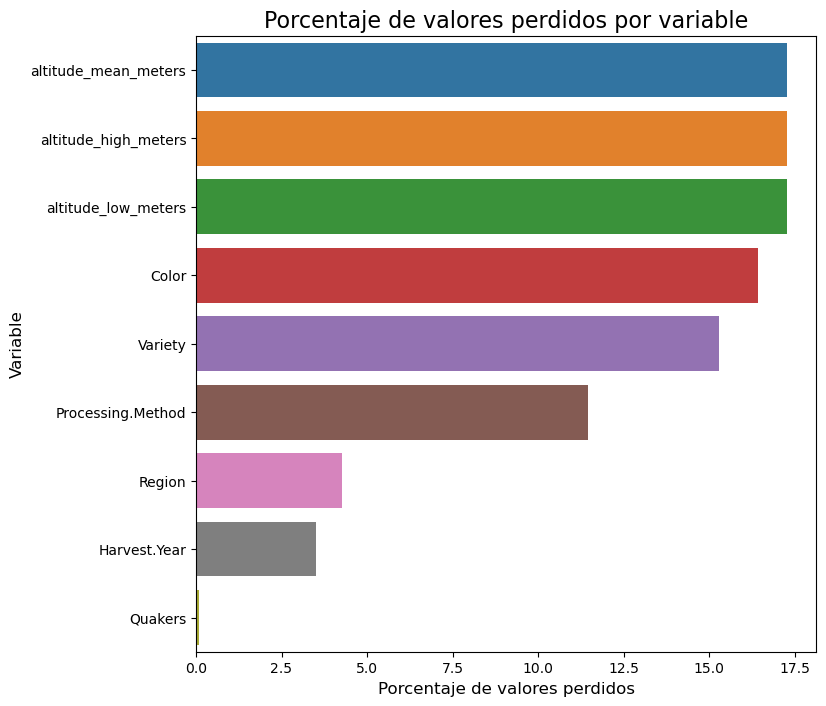

In [174]:
plt.figure(figsize=(8,8))
sns.barplot(x = missing_train['altitude_mean_meters':'Quakers'].Percent,
                    y = missing_train.index[0:9]).set_title("Porcentaje de valores perdidos por variable", fontsize=16)
plt.xlabel('Porcentaje de valores perdidos', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

# Correlación entre variables

In [179]:
#Matriz de correlaciones
corr_matrix = df2.corr()

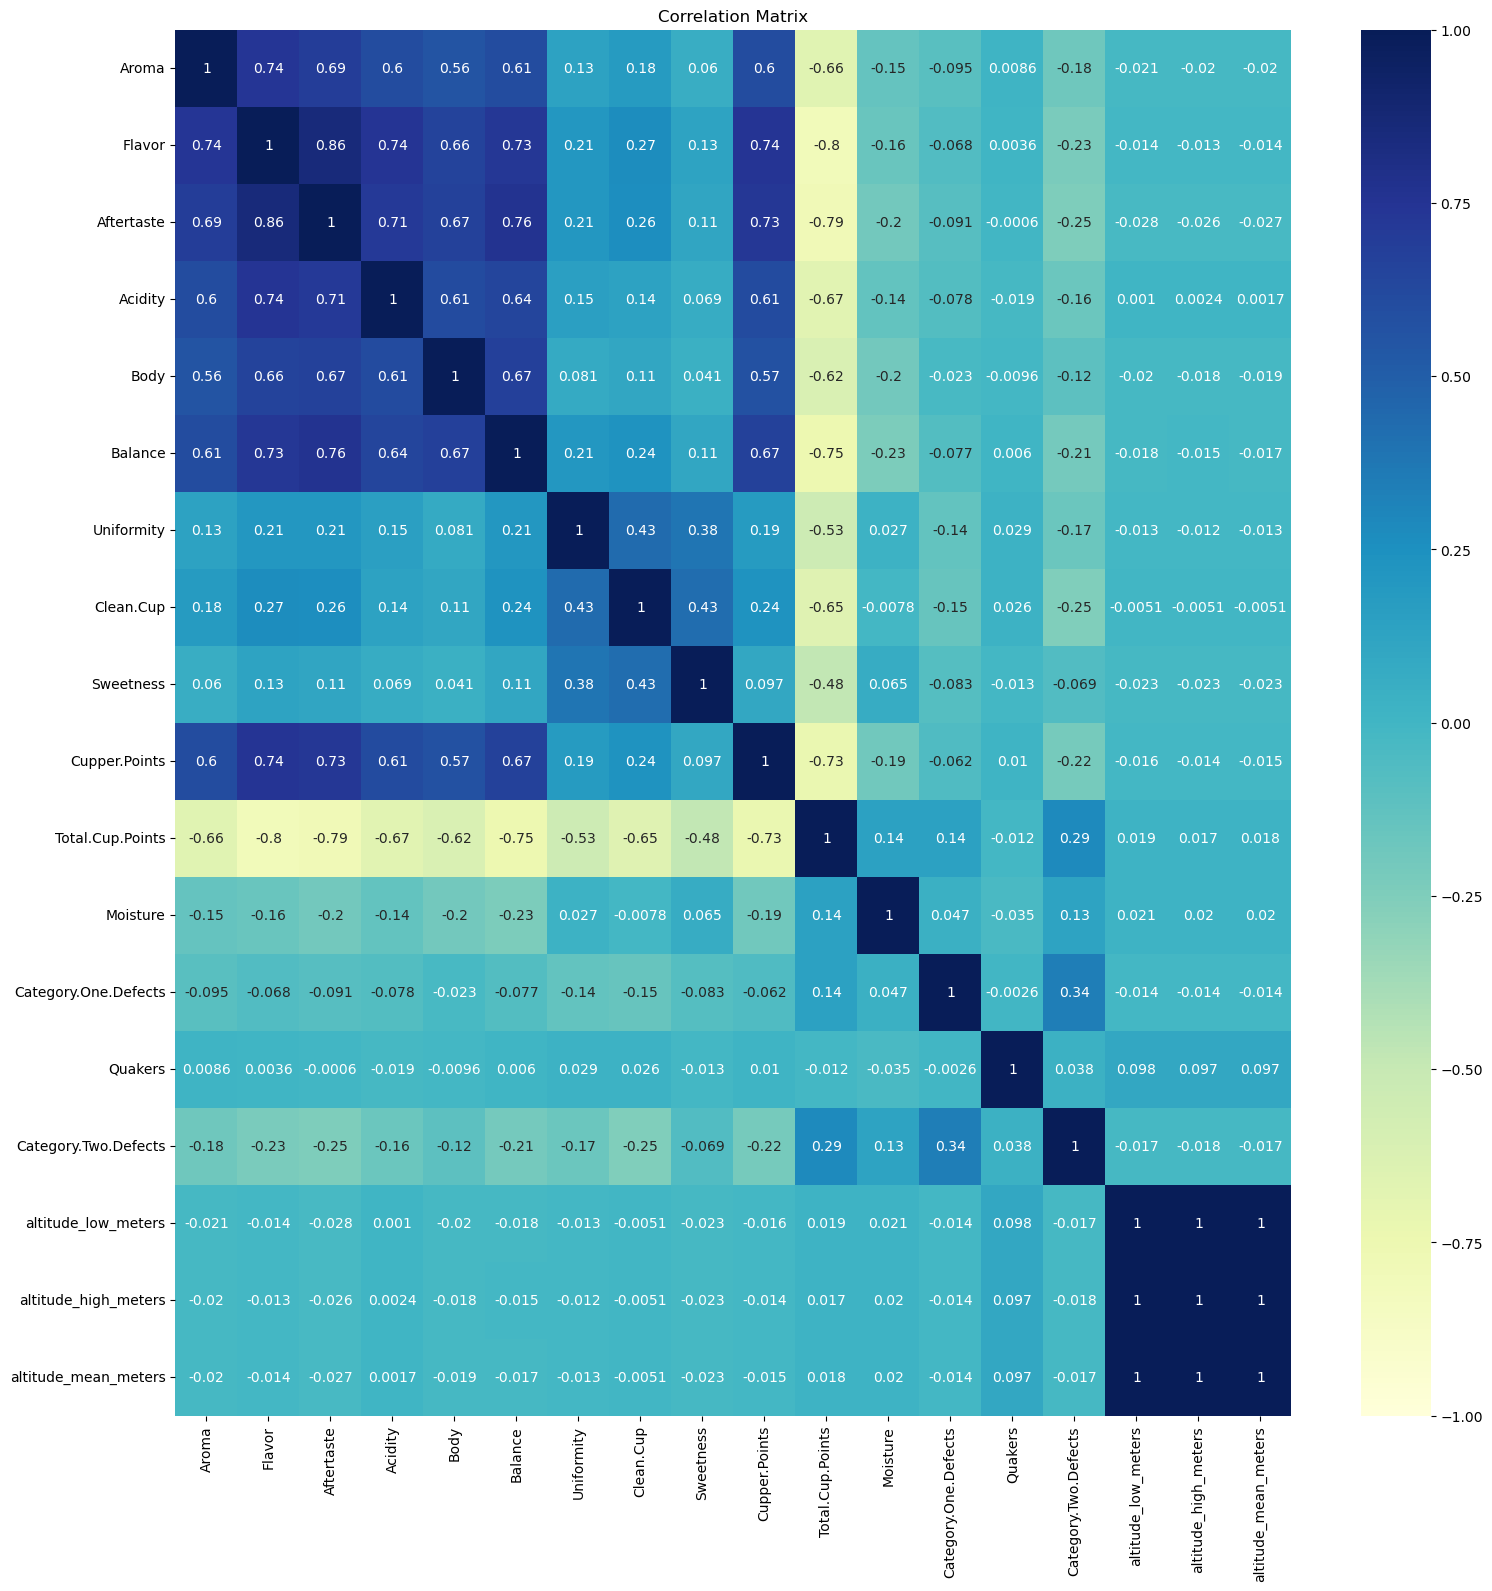

In [180]:
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [181]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix["Total.Cup.Points"].sort_values(ascending=False))
target_corr_df 

,Total.Cup.Points
Total.Cup.Points,1.000000
Category.Two.Defects,0.285011
Category.One.Defects,0.144507
Moisture,0.141208
altitude_low_meters,0.018893
altitude_mean_meters,0.018132
altitude_high_meters,0.017368
Quakers,-0.012143
Sweetness,-0.483520
Uniformity,-0.532717


En este caso ninguna variable presenta una elevada correlación con la variable de interés, pese a esto podemos observar que el flavor y el aftertaste influyen mucho en la variable Cupper.Points, y en este caso una de las variables que más afecta el total cup seria la presencia de defectos de categoría 2

# Separación de datos de training y test

In [175]:
df2=df2.reset_index(drop=True)
train=df2[div:]
test=df2[:div]

In [176]:
test

,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Taiwan,chiayi alishan 嘉義縣阿里山鄉,2013/2014,Typica,Other,7.75,7.75,7.50,7.50,7.50,...,7.58,0.012037,0.11,0,0.0,NaN,0,1300.0,1300.0,1300.0
1,Taiwan,nantou,2014,Typica,Natural / Dry,6.92,7.00,7.17,7.00,7.42,...,7.00,0.012579,0.00,0,0.0,NaN,1,700.0,700.0,700.0
2,Indonesia,lington nihuta,2014,Typica,Other,7.42,7.42,7.42,7.33,7.42,...,7.42,0.012220,0.11,2,0.0,None,6,1300.0,1300.0,1300.0
3,Mexico,san bartolo tutotepec,2012,Typica,Washed / Wet,7.50,7.67,7.00,7.50,7.33,...,7.67,0.012170,0.15,1,0.0,None,9,1144.0,1144.0,1144.0
4,Colombia,santander,2014,Caturra,Natural / Dry,7.67,7.83,7.67,7.75,7.67,...,7.50,0.011916,0.12,0,0.0,Green,3,1550.0,1550.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Mexico,coatepec,2012,Typica,Washed / Wet,7.33,6.75,6.67,7.25,7.50,...,7.00,0.013364,0.12,0,0.0,Green,30,1250.0,1250.0,1250.0
323,United States (Hawaii),kona,2012,Hawaiian Kona,Natural / Dry,7.42,7.75,7.67,7.58,7.67,...,7.67,0.011988,0.00,0,0.0,Green,2,NaN,NaN,NaN
324,Nicaragua,jinotega,NaN,NaN,NaN,7.50,7.50,7.33,7.42,7.50,...,7.50,0.012170,0.10,0,0.0,Green,1,1000.0,1000.0,1000.0
325,Mexico,zaragoza itundujia,2012,Typica,Semi-washed / Semi-pulped,7.50,7.17,6.92,7.50,7.25,...,7.00,0.012658,0.14,3,0.0,Green,17,1550.0,1550.0,1550.0


In [177]:
train

,Country.of.Origin,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
327,Brazil,south of minas,2015/2016,Yellow Bourbon,Natural / Dry,7.17,7.58,6.83,7.50,7.75,...,7.75,0.012220,0.00,0,0.0,Green,1,1.0,1.0,1.0
328,Taiwan,changhua baguashan 彰化市八卦山,2013/2014,Typica,Semi-washed / Semi-pulped,7.50,7.50,7.50,7.50,7.50,...,7.33,0.012146,0.11,0,0.0,Green,0,200.0,200.0,200.0
329,Vietnam,don duong,2012,Other,Natural / Dry,7.67,7.33,7.17,7.58,8.08,...,7.67,0.012060,0.00,0,0.0,None,17,1040.0,1040.0,1040.0
330,Brazil,south of minas,2013/2014,Yellow Bourbon,Washed / Wet,7.42,7.42,7.33,7.33,7.50,...,7.33,0.012258,0.12,0,0.0,Blue-Green,3,1260.0,1260.0,1260.0
331,Brazil,south of minas,2015/2016,Yellow Bourbon,Natural / Dry,7.17,7.42,7.17,7.08,6.92,...,7.33,0.012308,0.00,0,0.0,Green,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Colombia,huila,2016,Caturra,Washed / Wet,7.67,7.67,7.50,7.67,7.67,...,7.67,0.011988,0.11,0,0.0,Green,2,442.0,442.0,442.0
1305,Nicaragua,jinotega,NaN,NaN,NaN,7.58,7.50,7.25,7.25,7.50,...,7.33,0.012244,0.10,0,0.0,Green,1,NaN,NaN,NaN
1306,Mexico,villa talea de castro,2012,Typica,Washed / Wet,7.08,6.83,6.83,7.00,7.00,...,6.83,0.012739,0.12,0,0.0,None,14,1400.0,1400.0,1400.0
1307,China,yunnan,2015,Catimor,Washed / Wet,7.83,7.75,7.67,7.50,7.58,...,7.75,0.011940,0.10,0,1.0,Green,2,1650.0,1650.0,1650.0


In [178]:
test.to_csv("test.csv",index=False)
train.to_csv("train.csv", index=False)